# Conditional Probability

Conditional probability is the probability of an event occurring given that another event has occurred. It is denoted by $P(A|B)$, which represents the probability of event **A** occurring given that event **B** has occurred.

The formula for conditional probability is:

$$P(A|B) = \frac{P(A \text{ and } B)}{P(B)} \tag{1}$$

where $P(A \text{ and } B)$ is the probability of both events **A** and **B** occurring together, and $P(B)$ is the probability of event **B** occurring.

Conditional probability is an important concept in probability theory and is used in many real-world applications, such as predicting the likelihood of a disease given certain symptoms, or the probability of a customer buying a product given their demographic information.

---

### Example
A bag contains **5 red balls** and **3 green balls**. If a ball is randomly selected from the bag and it is known to be red, what is the probability that it was one of the first two balls drawn from the bag?

### Solution
Let **A** be the event that the ball was one of the first two balls drawn from the bag, and let **B** be the event that the ball is red. We want to find $P(A|B)$.

The probability of event **A** is:
$$P(A) = \frac{2}{8} \times \frac{1}{7} + \frac{6}{8} \times \frac{2}{7} = \frac{10}{28} \tag{2}$$

The probability of event **B** is:
$$P(B) = 5/8 \tag{3}$$

The probability of both events **A and B** occurring together is:

$$P(A \text{ and } B) = 2/8 * 1/7 = 1/28 \tag{4}$$

Therefore, the conditional probability of **A** given **B** is:

$$P(A|B) = \frac{P(A \text{ and } B)}{P(B)} = \frac{(1/28)}{(5/8)} = 0.057 \tag{5}$$

So the probability that the ball was one of the first two balls drawn from the bag, given that it is red, is **0.057**.

The probability of both events **A and B** occurring together is:

$$P(A \text{ and } B) = 2/8 * 1/7 = 1/28 \tag{4}$$

Therefore, the conditional probability of **A** given **B** is:

$$P(A|B) = \frac{P(A \text{ and } B)}{P(B)} = \frac{(1/28)}{(5/8)} = 0.057 \tag{5}$$

So the probability that the ball was one of the first two balls drawn from the bag, given that it is red, is **0.057**.

---

# Bayes' Theorem

Bayes' theorem is a formula in probability theory that describes the probability of an event occurring based on prior knowledge or information. It is named after Reverend Thomas Bayes, who first formulated it.

The theorem states that:

$$P(A|B) = P(B|A) * \frac{P(A)}{P(B)} \tag{6}$$

where:

* **$P(A|B)$** is the probability of event **A** occurring given that event **B** has occurred.
* **$P(B|A)$** is the probability of event **B** occurring given that event **A** has occurred.
* **$P(A)$** is the prior probability of event **A** occurring.
* **$P(B)$** is the prior probability of event **B** occurring.

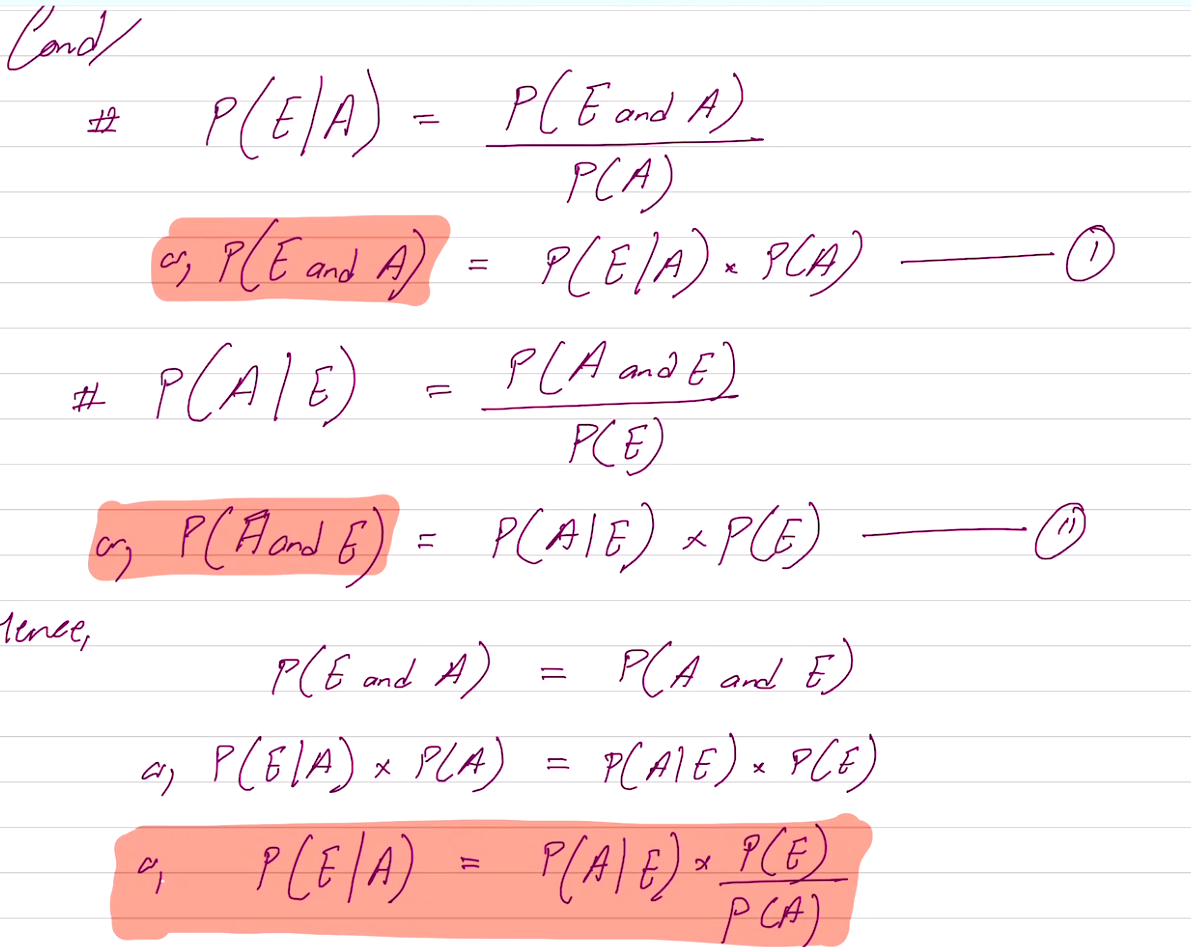

## Assumptions of Naive Bayes
* **Feature independence**: Features are assumed to be conditionally independent of each other, given the class label.
* **Continuous features**: Assumed to be normally distributed within each class.
* **Discrete features**: Assumed to have a multinomial distribution within each class.
* **Equal importance**: All features are assumed to contribute equally to the prediction.
* **No missing data**: The data should not contain any missing values.

### Mathematical Expansion of Naive Bayes

We can rewrite Bayes' theorem as:
$$P(y|X) = P(X|y) \times \frac{P(y)}{P(X)}$$

**Where:**
* $X = x_1, x_2, x_3, \dots, x_n$
* $y = \text{Yes or No}$

**Expanding the formula:**
Using the assumption of feature independence, the likelihood is expanded as follows:
$$P(y|x_1, x_2, \dots, x_d) = \frac{P(x_1|y) \cdot P(x_2|y) \dots P(x_d|y) \times P(y)}{P(x_1) \cdot P(x_2) \dots P(x_d) \text{ (const)}}$$

Using the product symbol ($\prod$), this can be simplified as:
$$= \frac{P(y) \times \prod_{i=1}^{d} P(x_i|y)}{C}$$

This implies that the posterior probability is proportional ($\propto$) to:
$$P(y|x_1, x_2, \dots, x_d) \propto P(y) \times \prod_{i=1}^{n} P(x_i|y)$$

---

### Final Prediction ($\hat{y}$)
To find the predicted class, we choose the $y$ that maximizes the resulting value:
$$\hat{y} = \text{arg max}_y \left( P(y) \times \prod_{i=1}^{n} P(x_i|y) \right)$$

## CODE

https://www.geeksforgeeks.org/machine-learning/naive-bayes-classifiers/

In [1]:
import pandas as pd
data = {
    "Outlook": ["Rainy", "Rainy", "Overcast", "Sunny", "Sunny", "Sunny", "Overcast", "Rainy", "Rainy", "Sunny", "Rainy", "Overcast", "Overcast", "Sunny"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Windy": [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    "Play Golf": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}
df = pd.DataFrame(data)

df.head()

,Outlook,Temperature,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [2]:
# Lable Encoding

from sklearn.preprocessing import LabelEncoder

encoded_df = pd.DataFrame()

for each in df.columns:
    encoder = LabelEncoder()
    encoded_df[each] = encoder.fit_transform(df[each])

    print(f"For {each} : {encoder.classes_} -> {list(range(0, len(encoder.classes_)))}")

For Outlook : ['Overcast' 'Rainy' 'Sunny'] -> [0, 1, 2]
For Temperature : ['Cool' 'Hot' 'Mild'] -> [0, 1, 2]
For Humidity : ['High' 'Normal'] -> [0, 1]
For Windy : [False  True] -> [0, 1]
For Play Golf : ['No' 'Yes'] -> [0, 1]


In [3]:
encoded_df.head()

,Outlook,Temperature,Humidity,Windy,Play Golf
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1


In [4]:
X = encoded_df.drop("Play Golf", axis=1).to_numpy()
Y = encoded_df["Play Golf"].to_numpy()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=999
)

In [8]:
classifier = CategoricalNB()
classifier.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None
,min_categories,None


In [9]:
classifier.predict_proba([[2,1,1,0]])

array([[0.25917927, 0.74082073]])

In [10]:
classifier.score(X_test, y_test)

0.6666666666666666